In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection,svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
np.random.seed(100)

In [2]:
df0=pd.read_csv("D:\\LAUNCH MY OWN DATA SCIENCE PROJECTS\\reviews_data.csv")
df0.head()

,Unnamed: 0,Review,Label
0,0,room beyond expect clean everything staff nice...,positive
1,1,stay extremely comfortable beautiful hotel sur...,positive
2,2,definitely worth price pay convenient place he...,neutral
3,3,meals location goodbetter change checkout time...,positive
4,4,worth money staff helpful friendly im happy se...,positive


In [3]:
df=df0.drop(df0[['Unnamed: 0']],axis='columns')
df.head()

,Review,Label
0,room beyond expect clean everything staff nice...,positive
1,stay extremely comfortable beautiful hotel sur...,positive
2,definitely worth price pay convenient place he...,neutral
3,meals location goodbetter change checkout time...,positive
4,worth money staff helpful friendly im happy se...,positive


In [4]:
X_train,X_test,y_train,y_test=train_test_split (df['Review'],df['Label'],test_size=0.2,random_state=10)

In [5]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(X_train,X_test)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [6]:
SVM = svm.SVC()
SVM.fit(Train_X_Tfidf,y_train)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(classification_report(predictions_SVM,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.66      0.67      0.66       240
           2       0.92      0.83      0.87       606

    accuracy                           0.78       846
   macro avg       0.53      0.50      0.51       846
weighted avg       0.85      0.78      0.81       846



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model hasn't performed well

<AxesSubplot:ylabel='Label'>

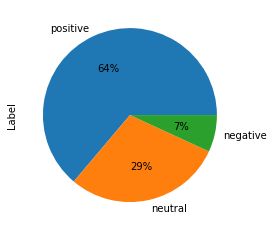

In [7]:
df.Label.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [8]:
class_count_0, class_count_1,class_count_2 = df['Label'].value_counts()
class_count_0, class_count_1,class_count_2

(2698, 1239, 290)

In [9]:
y=df['Label'].value_counts()
y

positive    2698
neutral     1239
negative     290
Name: Label, dtype: int64

In [10]:
class_0 = df[df['Label']=='positive']
class_0.shape

(2698, 2)

In [11]:
class_1 = df[df['Label']=='neutral']
class_1.shape

(1239, 2)

In [12]:
class_2=df[df['Label']=='negative']
class_2.shape

(290, 2)

In [13]:
class_2_over = class_2.sample(class_count_0, replace=True)
class_2_over.shape

(2698, 2)

In [14]:
test_over = pd.concat([class_2_over, class_0,class_1], axis=0)
test_over.head(3)

,Review,Label
3925,elevators corridors clean unpleasant,negative
850,table clothe restaurant clean,negative
501,food improve food,negative


In [15]:
class_count_0, class_count_1,class_count_2 = test_over['Label'].value_counts()
class_count_0, class_count_1,class_count_2

(2698, 2698, 1239)

In [16]:
y1=test_over['Label'].value_counts()
y1

positive    2698
negative    2698
neutral     1239
Name: Label, dtype: int64

In [17]:
class_0 = test_over[test_over['Label']=='positive']
class_0.shape

(2698, 2)

In [18]:
class_1 = test_over[test_over['Label']=='neutral']
class_1.shape

(1239, 2)

In [19]:
class_2 = test_over[test_over['Label']=='negative']
class_2.shape

(2698, 2)

In [20]:
class_1_over = class_1.sample(class_count_0, replace=True)
class_1_over.shape

(2698, 2)

In [21]:
test_over_over = pd.concat([class_1_over, class_0,class_2], axis=0)
test_over_over

,Review,Label
2659,first bad impression take us tuk tuk scooter r...,neutral
3711,stay one night dambulla go train ella location...,neutral
225,centrally locate close restaurants day activit...,neutral
714,front guy h replace guy service business also ...,neutral
1390,tha capsule spacious enough space store luggag...,neutral
...,...,...
4000,pool clean view cleanliness basic hotel items ...,negative
2863,stay rat roof owner lie say pet cat later tell...,negative
559,av breakfastadjoining room need sort wake nois...,negative
2380,hotel nice good facilities clean big room top ...,negative


positive    2698
neutral     2698
negative    2698
Name: Label, dtype: int64

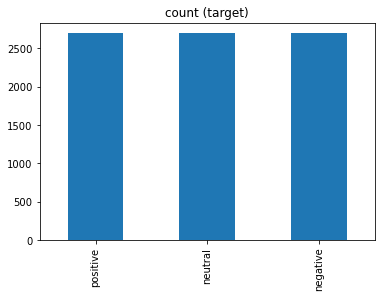

In [22]:
test_over_over['Label'].value_counts().plot(kind='bar', title='count (target)')
test_over_over['Label'].value_counts()

In [23]:
X1=test_over_over['Review']
y1=test_over_over['Label'] 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=10)

In [24]:
np.random.seed(100)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(X_train,X_test)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [25]:
SVM = svm.SVC()
SVM.fit(Train_X_Tfidf,y_train)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(classification_report(predictions_SVM,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       531
           1       0.95      0.89      0.92       605
           2       0.86      0.95      0.90       483

    accuracy                           0.94      1619
   macro avg       0.94      0.94      0.94      1619
weighted avg       0.94      0.94      0.94      1619



Classification Model performs well after balancing the dataset